<a href="https://colab.research.google.com/github/Amrutha-GR/AGR/blob/AI/SGD_BatchGD_MiniBatchGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
Home_Prices_df = pd.read_csv('/content/drive/MyDrive/Data_Science/DATA/homeprices_banglore.csv')
Home_Prices_df.sample(5)

,area,bedrooms,price
1,2600,4,120.0
5,1170,2,38.0
11,2785,4,140.0
10,1800,3,82.0
19,800,1,32.0


In [11]:
from sklearn import preprocessing

sx = preprocessing.StandardScaler()
sy = preprocessing.StandardScaler()

scaled_X = sx.fit_transform(Home_Prices_df.drop('price', axis = 1 ))
scaled_X

array([[-0.90830532, -0.95399809],
       [ 0.92385017,  1.16599767],
       [-0.45263971,  0.10599979],
       [-0.35652274,  0.10599979],
       [-0.73743072, -0.95399809],
       [-0.7730296 , -0.95399809],
       [ 1.08048522,  1.16599767],
       [ 1.75449061,  1.16599767],
       [-0.60690151,  0.10599979],
       [ 2.22914229,  2.22599555],
       [-0.0254532 ,  0.10599979],
       [ 1.14337657,  1.16599767],
       [-0.97475656, -0.95399809],
       [-0.85609364, -0.95399809],
       [ 0.50852995,  0.10599979],
       [-0.76709645, -0.95399809],
       [-0.7611633 ,  0.10599979],
       [-0.33397679,  0.10599979],
       [ 1.12557713,  0.10599979],
       [-1.2120824 , -2.01399597]])

In [12]:
scaled_y = sy.fit_transform(Home_Prices_df['price'].values.reshape(Home_Prices_df.shape[0],1))
scaled_y

array([[-0.93270651],
       [ 0.96466144],
       [-0.39512283],
       [-0.0903436 ],
       [-0.65301295],
       [-0.95779218],
       [ 1.31632978],
       [ 1.78522091],
       [-0.6764575 ],
       [ 2.06655558],
       [ 0.0737683 ],
       [ 1.43355256],
       [-0.95779218],
       [-0.91090307],
       [ 0.51921487],
       [-0.86401396],
       [-0.72334662],
       [-0.44201194],
       [ 0.54265942],
       [-1.09845952]])

In [13]:
np.ones(shape= (2))

array([1., 1.])

In [14]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape= (number_of_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        y_predict = np.dot(w, scaled_X.T) + b

        w_grad = -(2/total_samples)*(X.T.dot(y_true - y_predict))
        b_grad = -(2/total_samples)*np.sum(y_true - y_predict)

        w = w - learning_rate*w_grad
        b = b - learning_rate*b_grad

        cost = np.mean(np.square(y_true- y_predict))

        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list 

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.73213678, 0.26743589]), 7.122080702970366e-17, 0.03189534147576348)

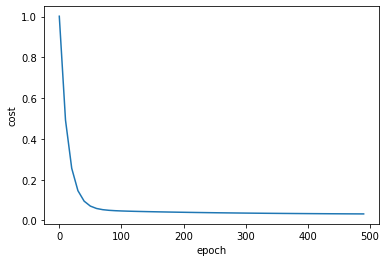

In [15]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list, cost_list)
plt.show()

In [53]:
def predict(area, bedroom, w, b):
    scaled_X = sx.transform([[area, bedroom]])[0]
    scaled_price = w[0]*scaled_X[0] + w[1]*scaled_X[1] + b
    return sy.inverse_transform([[scaled_price]])[0][0]
    

predict(2600, 4, w, b)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


121.00462015878352

In [25]:
predict(1000, 2, w, b)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


37.53096679457114

In [27]:
predict(1500, 3, w, b)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


68.15082198865382

Stocastic Gradient Descent

In [49]:
def Stocastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape= (number_of_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        import random
        random_index = random.randint(0, total_samples - 1)
        sample_X = X[random_index]
        sample_y = y_true[random_index]

        y_predict = np.dot(w, sample_X.T) + b

        w_grad = -(2/total_samples)*(sample_X.T.dot(sample_y - y_predict))
        b_grad = -(2/total_samples)*(sample_y - y_predict)

        w = w - learning_rate*w_grad
        b = b - learning_rate*b_grad

        cost = np.square(sample_y - y_predict)

        if i%100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list 

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = Stocastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),100000)
w_sgd, b_sgd, cost_sgd

(array([0.84720958, 0.14903911]), -0.001953561747142434, 0.0134947902475071)

In [50]:
w, b, cost

(array([0.73213678, 0.26743589]), 7.122080702970366e-17, 0.03189534147576348)

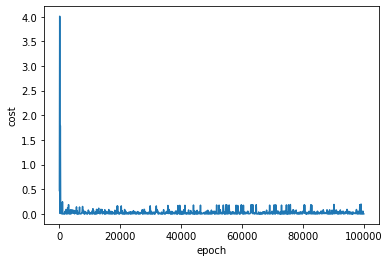

In [51]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list_sgd, cost_list_sgd)
plt.show()

In [55]:
predict(2600, 4, w_sgd, b_sgd)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


119.56744654178746

In [56]:
predict(1500, 3, w_sgd, b_sgd)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


65.6599583447024

In [69]:
def Mini_batch_gradient_descent(X, y_true, epochs, batch_size, learning_rate = 0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape= (number_of_features))
    b = 0
    total_samples = X.shape[0]

    if batch_size > total_samples:
        batch_size = total_samples

    cost_list = []
    epoch_list = []

    number_of_batches = int(total_samples/batch_size)

    for i in range(epochs):
        random_index = np.random.permutation(total_samples)
        mini_X = X[random_index]
        mini_y = y_true[random_index]

        for j in range(0, total_samples, batch_size):
            Xj = mini_X[j: j+batch_size]
            yj = mini_y[j: j+batch_size]

            y_predict = np.dot(w, Xj.T) + b

        w_grad = -(2/len(Xj))*(Xj.T.dot(yj - y_predict))
        b_grad = -(2/len(Xj))*np.sum(yj - y_predict)

        w = w - learning_rate*w_grad
        b = b - learning_rate*b_grad

        cost = np.mean(np.square(yj - y_predict))

        if i%100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list 

w_mini, b_mini, cost_mini, cost_list_mini, epoch_list_mini = Mini_batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000, 5)
w_mini, b_mini, cost_mini

(array([0.85554106, 0.14432251]), 0.005542358468229633, 0.0072924860342764766)

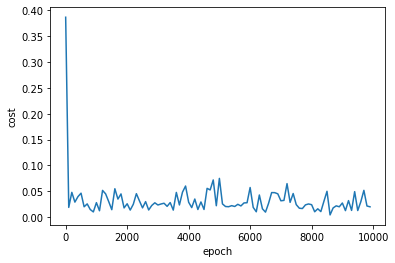

In [70]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list_mini, cost_list_mini)
plt.show()

In [71]:
predict(2600, 4, w_mini, b_mini)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


119.98090742733841